<a href="https://colab.research.google.com/github/pixelrunner/Meraki-AMS-Lab/blob/main/LABMER_2405_Meraki_Dashboard_Automation_using_Python_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Availability**
This guide and the lab will remain available until February 28th 2023



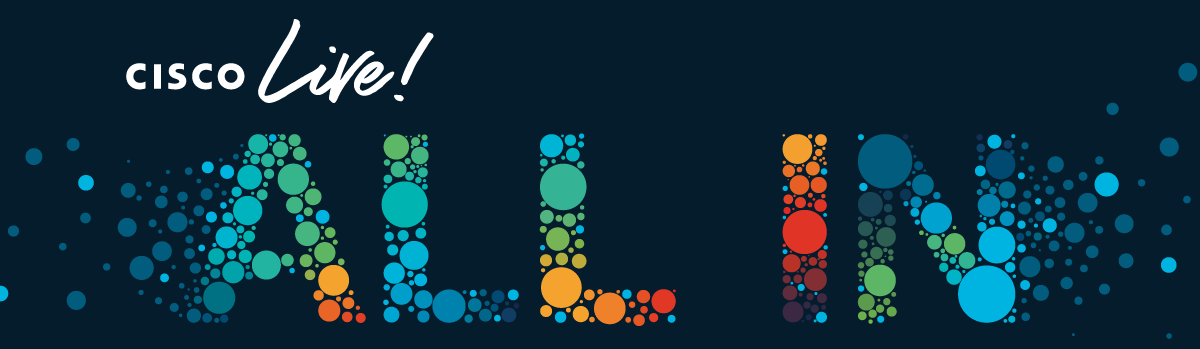

# **LABMER-2405 - Meraki Dashboard Automation using Python**

**Disclaimer**

This training document is to familiarize with writing automation on the Meraki Dashboard using Python. Although the lab design and configuration examples could be used as a reference, it’s not a real design, thus not all recommended features are used, or enabled optimally. For the design related questions please contact your representative at Cisco, or a Cisco partner.


# **Learning objectives**
This lab is designed to familiarize on how you can simplify automation on the Meraki Dashboard using Python.

Upon completing this lab you will be able to:
* search the Meraki API on line documentation
* setup and use the Meraki Python library
* understand and use basic Python commands
* understand and use the main data types and data structures used in Python to interact with the Meraki dashboard API
* write a script to fetch device status from the Meraki dashboard
* write a script to interact with firewall rules

Additional topics are also available at the end of the lab
* data tables for better visualization
* input and output using CSV files

See in the gif below the output of the last exercise of the lab, collecting configured L3 firewall rules across different organizations and networks in seconds.

**Please wait for the lab proctor before moving to the next section**
<img src='https://drive.google.com/uc?id=11U5ea9D7iUOJN9ytNBHS2WQskD1x6yLO'>


# **Task 1 - Setup**

## **Copy this workbook**
Start by creating a copy of the workbook.

**Note:** do not use incognito browsing.

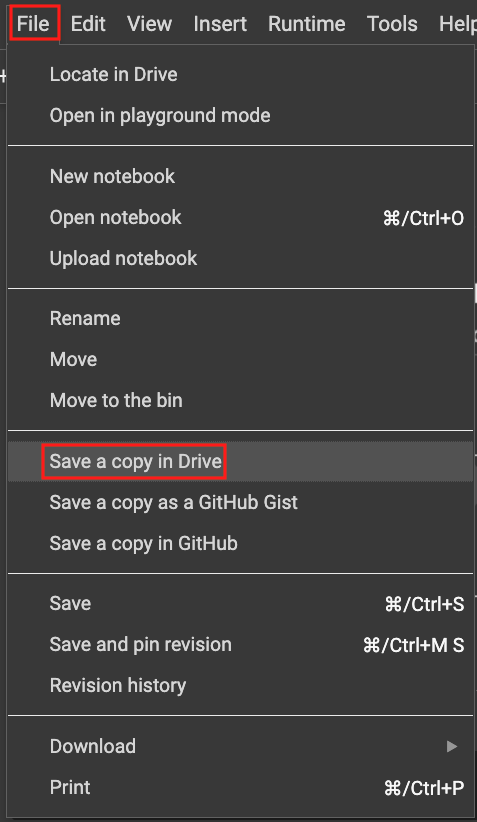

## **How to use google Colab**
1. Select the code
2. use CTRL+C (or Command+C) to copy
3. select the destination block
4. use CTRL+V (or Command+V) to paste
5. use the Play button &#9654; to run the code

**Test it in the next section**

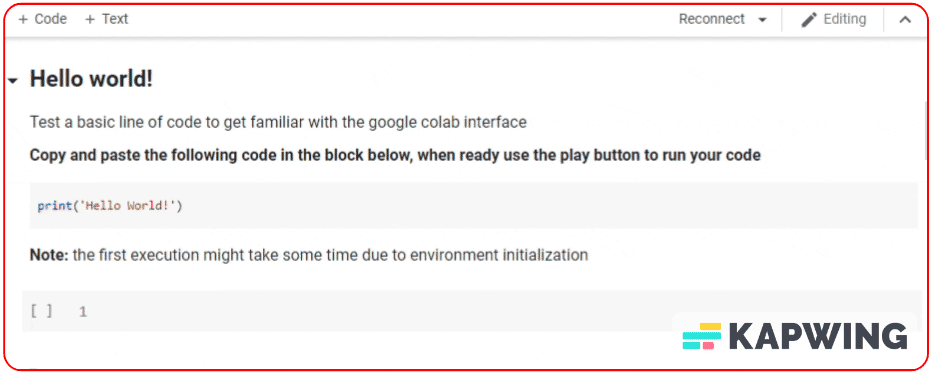


##**Hello world!**
Test a basic line of code to get familiar with the google colab interface

**Copy (CTRL+C or Command+C) and paste (CTRL+V or Command+V) the following code in the block below, when ready use the play button &#9654; to run the code**

```python
print('Hello World!')
```
**Note:** the first execution might take some time due to environment initialization

## **Install the Meraki Python library** 
Install the Meraki Python library.

**Copy and paste the following code in the block below, when ready use the play button to run your code**
  

```bash
!pip install meraki
```
**Note:** the first execution might take some time due to environment initialization

**Note:** if the environment gets disconnect the libraries must be installed again 








# **Task 2 - First API call's**
Lets use the newly installed library to:

1. Get organizations

2. Print organizations

## **Get Organizations** 
The Meraki API interactive documentation can be used to understand the payload of a request/response and contain examples to copy paste and edit.

Copy the Meraki Python Library GET request for organizations from the API docs and paste it into the code block below.

[GET Organizations Request](https://developer.cisco.com/meraki/api-v1/#!get-organizations)

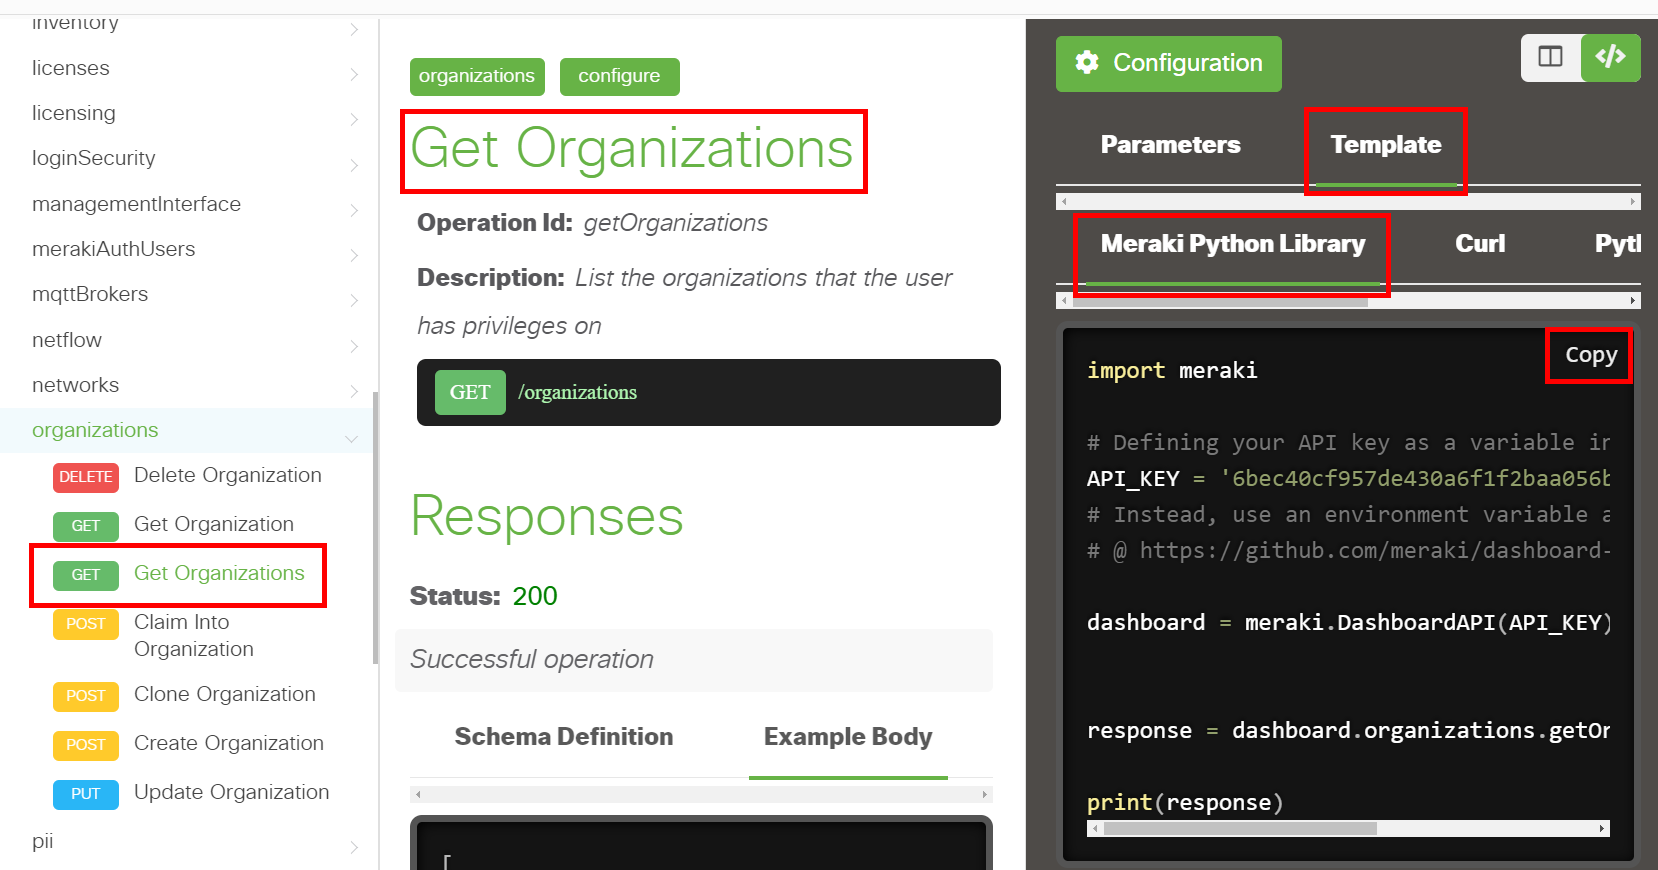

This code already contains a read only API KEY available for testing.

The following code will request a list of all the organizations accessible with the specified variable API_KEY

```python
import meraki

# Defining your API key as a variable in source code is not recommended
API_KEY = '6bec40cf957de430a6f1f2baa056b99a4fac9ea0'
# Instead, use an environment variable as shown under the Usage section
# @ https://github.com/meraki/dashboard-api-python/

dashboard = meraki.DashboardAPI(API_KEY)

response = dashboard.organizations.getOrganizations()

print(response)
```
Run the code

In the console output it is possible to identify 
* 4 logging messages generated by the Meraki python library, INFO and DEBUG lines
* the output of the resulting API call in [JSON (JavaScript Object Notation)](https://en.wikipedia.org/wiki/JSON) format, last line in the console output

JSON is the data format of choice when transferring data using API because it  uses human-readable text to store and transmit data objects consisting of attribute–value pairs and arrays (or other serializable values) and is a language-independent data format.

## **The Meraki Python libary** 
The lab focusses on the use of the Meraki Python library because it the easiest way to approach scripting. It provides out of the box functionality like logging, error handling and rate limit.
Similar functionalities can be implemented without using the dedicated library but that requires a level of knowledge outside of the scope for this lab.

For a clearer output from now on the embedded logging functionality will be disabled using the optional parameter **suppress_logging**.

Check below the new version of the code that include the suppress logging.
```python
import meraki

# Defining your API key as a variable in source code is not recommended
API_KEY = '6bec40cf957de430a6f1f2baa056b99a4fac9ea0'

# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

# get organizations
response = dashboard.organizations.getOrganizations()

# print the response
print(response)

```
Run this code and compare the output between this and the previuos one. Notice any differences?

This time the console output does not include any logging information.

Only the content of **response** is displayed. 

##**Print Organizations**
The variable **response** contains the list of all the organization accessible with the given API key.

**Print** is a Python method to display data in the console output.

```python 
print(response)
```
Run the code to print again the content of **response**.

This output contains a lot of information about all the organizations accessible with an API key, but it is still hard to read.

The next 2 tasks will focus on extract useful information and improve readability of a JSON response.

## **About API keys**
API keys are an access token to a resource, in the Meraki dashboard each administrative user can autonomously create and maintain personal API keys.

* An API key provides access to resources and needs to be used and stored securely.
* Different API key can provide access to different resources.

* Remember to follow up to date security best practices when storing and operating with API keys.

Lets test this code, it is an exact copy of the previous one with a different API key.

```python
# import the meraki python library
import meraki

# configure the api key to to use 
API_KEY = 'f0f4318336572138a3814fe89254c4eac55d5dcb'

# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

# use the 'dashbaord' object retrive the list of all the organizations
response = dashboard.organizations.getOrganizations()

# print the list of all the organization in JSON
print(response)
```
Run the code, notice any difference in the output produced printing **response**? 


This new API key provide access to a different group of organizations, including the organization used for this lab.

#**Task 3 - Python Basics**
Before going any further, lets review some basic python concepts.

## **Comments**

A line that starts with # (pound/hashtag) is a comment
```python
# this is a comment not a line of executable code
print('This is executed code')
```
Test the code to see that only the second line is interpreted as executable while the comment is ignored.

Comments are useful to make code easier to understand and share.

All the examples shared during this lab will contain comments to help understand the code.

## **Data Types**
Variables in programming laguages can contains all sorts of infomration, to determine the operations that can be performed on a variable it's fundamental to know the type of a variable.
This lab will focus on the main data types used when interacting with dashboard via API

*   Integer (int)
*   String (str)
* List (list)
* Dictionary (dict)



### **Integer**

An integer is a whole number (a number that is not a fraction)

```python
# an integer, <class int>
# store an integer in a variable
variable=3
# print the value
print(variable)
```

In python it is possible to print the information of what data type is currently contained in a variable using the type(function)
```python
# print the type
print(type(variable))
```
Run the code to display the data type 

### **String**

A string is text contained between single quotes (or double quotes)

'this is a string'

"this is also a string"

```python
# a string, <class 'str'>
# store a string in a variable
variable='I am a string'
# print the value
print(variable)
# print the type
print(type(variable))
```

**Question:** what's the type of *variable* in this case?
```python
variable='3'
print(variable)
print(type(variable))
```
Test the code to see the answer.

It is important to remember that any sequence of characts in quotes is a **string** (str) and should be treated as text, plenty of fields in API responses might contain a string made only of numerical characters (e.g.: 'organization_id': '3665367146726162449' ) and must be handled as text.

```python
# two integers
number_a=3
number_b=4
# two strings
string_a='3'
string_b='4'

print('Result of adding two integers')
print (number_a+number_b)
print('Result of adding two strings')
print (string_a+string_b)
```
Test the code to see an example of how differently integers and strings behave. 

### **String concatenation**

Strings and other variables can be concatenated to produce console output that are easier to read.

**Hint:** to get familiar with the code editing, change the value of the veriable **my_name** with your name in the first line of code.

Replace **'type your name here'** with **'[your name]'**

```python
my_name = 'type your name here'
meraki_devices = '5'

# concatenate a text to a variable
print ('My name is ' , my_name)
# concatenate text and variables for more readable output 
print ('My name is ' , my_name, ' and I have ' , meraki_devices, ' meraki devices')
```



### **List**

*   **Lists** are used to store multiple rows of similar items (e.g.: all orgnaizations, all the networks in an organization)
* **List** use square brackets as a delimiter [ ] and commas , as a separator

Example of a list:

**name_of_the_list = [item 1, item 2,item 3]**

```python
# my list
my_list=['Network Amsterdam','Network London','Network Rome']
# print the full list
print (my_list)
# print an element from the list
print (my_list[1])
# print the type
print(type(my_list))
```
Run the code to set up a list with 3 elements, print the whole list, print a single element and print the type of the variable

**Why the list data type is important:** the previous example used string as each element of the list -- 'Network Amsterdam','Network London','Network Rome' -- when dealing with dashboard API most of the results will return list structure

Some example includes:
* retrieve all the networks in an organization (list of organizations)
* retrieve all the devices in a network (list of devices),
* retrieve all the firewall rules applied on a security appliance (list of rules)

List can be accessed/iterated one element at time by using loops (**for** loop in Task 4 later)

### **Dictionaries**
*   **Dictionaries** are collection of key, value pair related to the same item
* **Dictionaries** use curly brackets as a delimiter { } colon : between the key and the value and commas , as a separator

```python
# my dictionary
my_dict={'name':'home network','#device': '4','status':'ok'}
# print the full dictionary
print (my_dict)
# print the value associated to the key 'name'
print (my_dict['name'])
# print complex sentences usinf string concatenation
print ('This network name is' , my_dict['name'] , ', contains' , my_dict['#device'] , 'devices, and the status is', my_dict['status'])
# print the type
print(type(my_dict))
```

**Why the dictionary data type is important?**

A dictionary provides a native data structure in python that can be mapped 1 to 1 with the JSON data format used to send and retrieve information to the Meraki dashboard via API.

Using this property, it's possible to convert a JSON payload into a dictionary, perform operations in python treating the response as a dictionary and convert it back to JSON before sending data back to dashboard.

The Meraki Python library perform this conversions automatically.


##**Data types in action**
Print the response from the first example and notice how **list**, **dictionaries** and **string** appear in the response to the first get request.

```python
print(response)
```



# **Task 4 - Loops and Filters**

Rest API response can contain too much information it's important to learn how to use:
 
* **For** loops, to iterate over all the elements of a list
*   Attribute filter, to select only some fields of a dictionary by specifying  a key 
*  **If Else** statements, to perform an action only only if a condition is meet or retreive a specific element.



The first API call was working but readability can be improved.

Perform the first API call again.

```python
import meraki

# Defining your API key as a variable in source code is not recommended
API_KEY = 'f0f4318336572138a3814fe89254c4eac55d5dcb'

# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

response = dashboard.organizations.getOrganizations()

print(response)
```

Run the code.

## **For loop** 
Because **response** is a list it can be processed using a **for** loop.

In a for loop each entry of a list is extracted one item at a time and actions can be performed on each item.

In this example for each element contained in **response** the item is assigned to the variable **org** an is printed out.

```python
for org in response:
  print(org) 
```
Run the code and notice how each organization gets printed out.

Print one item per line improved the readability, each organization is now a separate line in the console output.

## **Filters** 
The previous output is more organized but still display to much information.

Reduce the output to 2 fields for each organization: **id** and **name**

Each **org** is a dictionary, use the correct key to print the associated value. 

```python
for org in response:
  print(org['id'],org['name'])
```



**Exercise:** Edit the previous code to print out different fields available in an organization like 'url' or 'api'

Use string concatenation for a better looking output
```python
for org in response:
  print('Org ID: ', org['id'], '--- Org Name: ', org['name'])
```




## **If** 
An additional necessity when designing a script might be to perform an action only on specific item of a list **if** a condition is met or not.

Examples
* filter all the networks in an organization if tagged with a specific tag
* print the name of a device if the status is 'offline'

We can filter the list of orgs for a particular item, using an **if** statement.

```python
# loop on all the organizations
for org in response:
  #  if the name match the string 'Cisco LIVE AMS 23 - Automation Lab'
  if org['name'] == 'Cisco LIVE AMS 23 - Automation Lab':
    # print the organization id and the organization name
    print('Org ID: ', org['id'], '--- Org Name: ', org['name'])
```
Run the code and notice how the output is reduced to a single organization, the one that match the name/string **'Cisco LIVE AMS 23 - Automation Lab'**

## **If Else** 
Using ***if..else*** it's also possible to perform a task on each element that does not meet the condition in the **if**

```python
# loop on all the organizations
for org in response:
  #  if the name match the string 'Cisco LIVE AMS 23 - Automation Lab'
  if org['name'] == 'Cisco LIVE AMS 23 - Automation Lab':
    # print the organization id
    print('Organization Found! Org ID:', org['id'])
  #if the condition is not met
  else:
    # print an info message for the user
    print('This organization name does not match, Org name :',org['name'])
```

Run the code.

**TABs**

Python use tabulations (tab) to define what's inside a block.

A block begin with colon : and use indentation to define what's inside a block and what is outside.

Run the 2 examples

Example 1
```python
print ('Outside of the for loop - print once')
# loop 3 times
for i in range(3):
  #print inside the loop
  print (i,' Inside the for loop - print each time')
#print outside of the loop
print ('Outside of the for loop - print once')
```


Example 2
```python
print ('Outside of the for loop - print once')
# loop 3 times
for i in range(3):
  #print inside the loop
  print (i,' Inside the for loop - print each time')
  #print inside the loop
  print ('  Not outside anymore - print each time')
```


Both examples print something than execute a loop 3 times.

See how a single tab of difference in the last line heavily changes the behaviour of the code regarding what is inside a loop or not.

**Note:** TABs affect what is inside any block of code not only for loops.

# **Task 5 - Recap so far**
Assembling what was done in the previous tasks the code is performing the following actions:

1.   Import the Meraki Python library
2.   Configure a valid API_KEY
3. Create a Dashboard variable to be used for API calls
4. Retrieve the list of all the organizations
5. Print all the organizations name and id with a for loop
6. Search a specific organization by name and print the organization ID


Try and identify those different actions in the code below
```python
# import the meraki library
import meraki

# Defining your API key as a variable in source code is not recommended
API_KEY = 'f0f4318336572138a3814fe89254c4eac55d5dcb'

# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

#get the list of all the org
response = dashboard.organizations.getOrganizations()

# print all the org id and org name
print ('\n=== Print all the org id and org name ===')
for org in response:
  print('Org ID: ', org['id'], 'Org Name: ', org['name'])

# find the org ID of with the specified name
print ('\n=== Find the org id ===')
for org in response:
  if org['name'] == 'Cisco LIVE AMS 23 - Automation Lab':
    print('Org ID: ',org['id'])
```
Run the code.

# **Exercise 1 - Device status**

## **Scenario**
Try it yourself, using [API docs](https://developer.cisco.com/meraki/api-v1/) write a script to print the serial number and the status of wireless devices in the **Cisco LIVE AMS 23 - Automation Lab** organization.

**Note:** it is possble to skip this exercise and just observe a possible solution avaliable in the *solution* section.
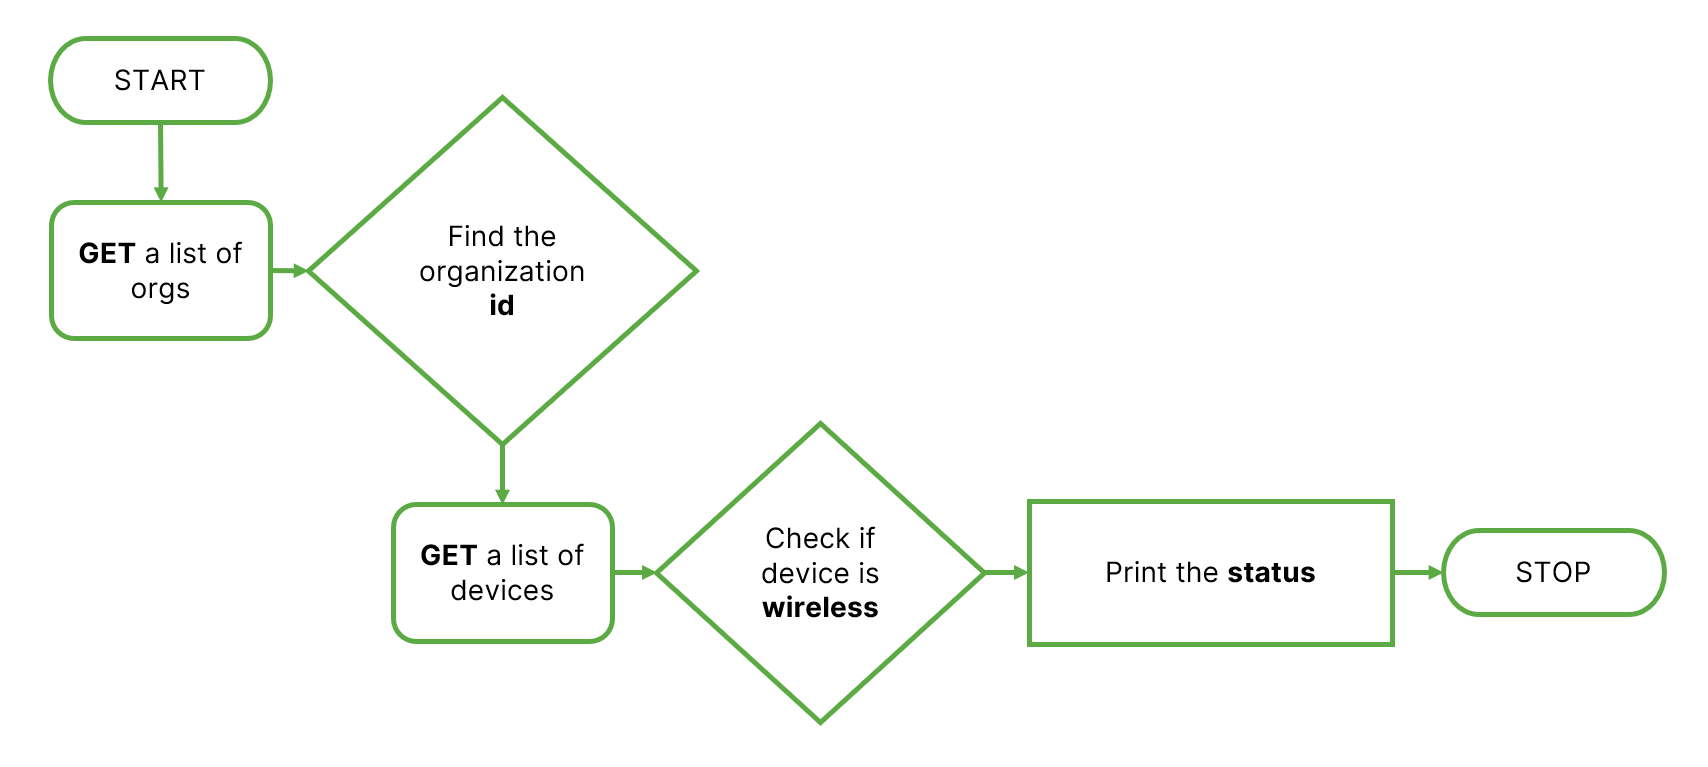

**Hint:** Use [Get Organization Devices Statuses](https://developer.cisco.com/meraki/api-latest/#!get-organization-devices-statuses)

this are the names used in the dictionary associated with a device

**['serial']** serial number 

**['status']** status of the device

**['productType']** type of the device, 'wireless' is the string value identifying a wireless device

**Hint:** reuse the code already created so far, its avaialbe below.

```python
# import the meraki library
import meraki

# Defining your API key as a variable in source code is not recommended
API_KEY = 'f0f4318336572138a3814fe89254c4eac55d5dcb'

# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

# get the list of all the org
response = dashboard.organizations.getOrganizations()

# Find org id for Cisco LIVE AMS 23 - Automation Lab
print ('=== Find the org id for Cisco LIVE AMS 23 - Automation Lab ===')
for org in response:
  if org['name'] == 'Cisco LIVE AMS 23 - Automation Lab':
    #print the org id
    print('Org ID: ',org['id'])
    #save the org id to be used later
    organization_id=org['id']

# get the list devices with status
# loop over the list to find the wireless devices
# print devices serial number and status
```

Compose and run the code in the box below.

## **Solution** 
Find the code below


```python
# import the meraki library
import meraki

# Defining your API key as a variable in source code is not recommended
API_KEY = 'f0f4318336572138a3814fe89254c4eac55d5dcb'

# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

# get the list of all the org
response = dashboard.organizations.getOrganizations()

# Find org id for Cisco LIVE AMS 23 - Automation Lab
print ('=== Find the org id for Cisco LIVE AMS 23 - Automation Lab ===')
for org in response:
  if org['name'] == 'Cisco LIVE AMS 23 - Automation Lab':
    #print the org id
    print('Org ID: ',org['id'])
    #save the org id to be used later
    organization_id=org['id']

#find all the device status in the organization
response_devices = dashboard.organizations.getOrganizationDevicesAvailabilities(
    organization_id, total_pages='all')

print('=== Print the status of the wireless devices ===')
# iterate on all the devices with a for loop
for device in response_devices:
    # filter the device tipe to only print wireless devices
    if device['productType'] == 'wireless':
        # print device serial number and device status
        print('Device Serial:',device['serial'],'--- Status:',device['status'])

```


# **Exercise 2 - Layer 3 firewall rules**

## **Scenario**
Find a specific organization by name and for each network in the organization print out all the layer 3 firewall rules applied on the MX security appliance in the network.

**Note:** it is possble to skip this exercise and just observe a possible solution avaliable in the *solution* section.

* Find an org id using the name, org name: **Cisco LIVE AMS 23 - Automation Lab**

* Get all the network in the organization, using the [Get Organization Networks](https://developer.cisco.com/meraki/api-latest/#!get-organization-networks)

* Get all the firewall rules in a network a using the [Get Network Appliance Firewall L3 Firewall Rules](https://developer.cisco.com/meraki/api-latest/#!get-network-appliance-firewall-l-3-firewall-rules)

* For each network print the list of all layer 3 firewall rules one per line 

**Hint:** pay attention to the JSON structure of the reposnse to *Get Network Appliance Firewall L3 Firewall Rules*, its not a list but a dictionay containing a list, use the **print(type())** shown in Task3 - Data Types to check the type of a variable.

**Hint:** reuse the code already created so far, its avaialbe below.
```python
import meraki

# Defining your API key as a variable in source code is not recommended
API_KEY = 'f0f4318336572138a3814fe89254c4eac55d5dcb'
# define the  organization name to find
org_name_to_find='Cisco LIVE AMS 23 - Automation Lab'

# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

# get the list of all the org
response = dashboard.organizations.getOrganizations()

print ('=== Find the org id for',org_name_to_find,'===')
for org in response:
  if org['name'] == org_name_to_find: 
    #print the org id
    print('Org ID: ',org['id'])
    #save the org id to be used later
    organization_id=org['id']


print ('Org ID found:',organization_id)

#GET all the networks
# iterate over each network
# FOR each network
#  GET the L3 firewall rules
#  Iterate over each rule
#   PRINT the firewall rules
```



## **Solution**

```python
import meraki

# Defining your API key as a variable in source code is not recommended
API_KEY = 'f0f4318336572138a3814fe89254c4eac55d5dcb'
# define the  organization name to find
org_name_to_find='Cisco LIVE AMS 23 - Automation Lab'

# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

# get the list of all the org
response = dashboard.organizations.getOrganizations()

print ('=== Find the org id for',org_name_to_find,'===')
for org in response:
  if org['name'] == org_name_to_find: 
    #print the org id
    print('Org ID: ',org['id'])
    #save the org id to be used later
    organization_id=org['id']


# using the org id get all the network in the selected organization
network_list = dashboard.organizations.getOrganizationNetworks(organization_id, total_pages='all')

# iterate over each network
for network in network_list:
  
  # print the name for clarity
  print(network['name'])
  
  # retrive all the L3 FW rules for each network
  fw_rules = dashboard.appliance.getNetworkApplianceFirewallL3FirewallRules(network['id'])
  # print(type(fw_rules))
  
  # extract the list of the firewall rules
  rules_list=fw_rules['rules']
  # print(type(rules_list))
  
  # iterate over rule element and print it 
  for rule in rules_list:
     print(rule)
```



**Congratulations, you have now completed the lab!**

# **Appendix - Additional topics**


*   Table output 
*   CSV Output
* CSV Input



## **Tables**
Additional libraries can be used to obtain easier to read output.

In the next example **prettytable** will be used to display the same output in a table format.

Install the library first.

```bash
!pip install prettytable
```



Try and run the code as an alternative to the last exercise to display the output in a table. 

```python
import meraki
import prettytable

# Defining your API key as a variable in source code is not recommended
API_KEY = 'f0f4318336572138a3814fe89254c4eac55d5dcb'
# define the  organization name to find
org_name_to_find='Cisco LIVE AMS 23 - Automation Lab'
# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

# get the list of all the org
response = dashboard.organizations.getOrganizations()

print ('=== Find the org id for',org_name_to_find,'===')
for org in response:
  if org['name'] == org_name_to_find: 
    #print the org id
    print('Org ID: ',org['id'])
    #save the org id to be used later
    organization_id=org['id']

network_list = dashboard.organizations.getOrganizationNetworks(organization_id, total_pages='all')

for network in network_list:
  print(network['name'])
  response = dashboard.appliance.getNetworkApplianceFirewallL3FirewallRules(network['id'])
  field_names = response['rules'][0].keys()
  table = prettytable.PrettyTable()
  table.field_names = field_names
  for rule in response['rules']:
          table.add_row(list(rule.values()))
  print(table)
```



## **CSV files as output**
Comma-separated value (.csv) file can be used as an alternative to the console to store the output generated from the code.

This example will store L3 FW rules in a separate .csv file for each network.

Try and run the code as an alternative to the last exercise.

```python
import meraki
import csv

# Defining your API key as a variable in source code is not recommended
API_KEY = 'f0f4318336572138a3814fe89254c4eac55d5dcb'
# define the  organization name to find
org_name_to_find='Cisco LIVE AMS 23 - Automation Lab'

# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

# get the list of all the org
response = dashboard.organizations.getOrganizations()

print ('=== Find the org id for',org_name_to_find,'===')
for org in response:
  if org['name'] == org_name_to_find: 
    #print the org id
    print('Org ID: ',org['id'])
    #save the org id to be used later
    organization_id=org['id']

network_list = dashboard.organizations.getOrganizationNetworks(organization_id, total_pages='all')

for network in network_list:
  print(network['name'])
  response = dashboard.appliance.getNetworkApplianceFirewallL3FirewallRules(network['id'])
  field_names = response['rules'][0].keys()
  with open(network['name']+'.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=field_names)
    writer.writeheader()
    for rule in response['rules']:
      writer.writerow(rule)
  print('CSV file created.')
```


Generated files can be found in the **File** tab

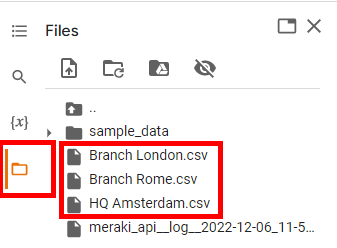

##**CSV files as input**
Similar methods can be used to source information from a CSV file.

Update the code using a file name generated in the previous exercise, for example **HQ Amsterdam**

**Hint:** the file name is case sensitive.
```python
import csv

#update this with a file name in your file list from the previous exercise 
with open('< yourfile name >.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        print (type(row))
        print (row)
        # uncomment the row below the demonstrate how to access row as a dictionary
        #print ('=> Comment: ', row['comment'], ', Policy: ', row['policy'])
```



Use a csv file as a source to update all the L3 firewall rules for all the network of an org

Update the code using a file name generated in the previous exercise.

**Hint:** the file name is case sensitive.

**This code will fail due to read only permission API KEY**

```python
import csv
import meraki


# Defining your API key as a variable in source code is not recommended
API_KEY = 'f0f4318336572138a3814fe89254c4eac55d5dcb'

# define the org name do find
org_name_to_find='Cisco LIVE AMS 23 - Automation Lab'

# define csv file to use as a source
csv_file_name='< yourfile name >.csv'

# set a new variable to suppress logging
suppress_logging=True

# passing the API_KEY and the disabling the logging
dashboard = meraki.DashboardAPI(API_KEY,suppress_logging=suppress_logging)

# get the list of all the org
response = dashboard.organizations.getOrganizations()

#print ('=== Find the org id for',org_name_to_find,'===')
for org in response:
  if org['name'] == org_name_to_find: 
    #print the org id
    print('Org ID: ',org['id'])
    #save the org id to be used later
    organization_id=org['id']

# create an empty list
my_rules_list=[]

# create a list with all the rules in the csv file 
with open(csv_file_name) as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
      my_rules_list.append(row)

#print(my_rules_list)

#get all the networks
network_list = dashboard.organizations.getOrganizationNetworks(organization_id, total_pages='all')

#for each network apply the same set of firewall rules obtained from the csv file
for network in network_list:
  #this call will fail with a 403 Forbidden
  dashboard.appliance.updateNetworkApplianceFirewallL3FirewallRules(network['id'], rules=my_rules_list)
```

**Lab completed**

# **Other walk in labs from the same proctors**
[Meraki Dashboard Automation using Python - LABMER-2405](https://www.ciscolive.com/emea/learn/sessions/session-catalog.html?search=LABMER-2405#/)

**Mark Alsing**, Technical Training Specialist, Cisco Meraki

**Sandro Nardi**, Technical Training Specialist, Cisco Meraki

# **Related sessions at Cisco Live!**
[Cisco Meraki: Enabling Infrastructure as Code - BRKMER-2663](https://www.ciscolive.com/emea/learn/sessions/session-catalog.html?search=BRKMER-2663#/)

**Cory Guynn**, Product Management Architect, Cisco

**Holger Struckmann**, Technical Solutions Architect, Cisco


---


[Introduction to the Meraki Dashboard API - DEVWKS-1494](https://www.ciscolive.com/emea/learn/sessions/session-catalog.html?search=DEVWKS-1494#/)

**Jon Hartman**, Systems Engineer, Cisco

---

[Intro to Meraki Dashboard API Python Library - DEVNET-1303](https://www.ciscolive.com/emea/learn/sessions/session-catalog.html?search=DEVNET-1303#/)

**Adrian Iliesiu**, Software Engineering Technical Leader, Cisco

---

[Simplifying network management with Meraki API - BRKOPS-2810](https://www.ciscolive.com/emea/learn/sessions/session-catalog.html?search=BRKOPS-2810#/)

**Mikael Fredriksson**, Systems Engineer, Cisco

**Ahmed Elshinnawy**, Systems Engineer, Cisco

---

[Meraki 201 - Programmatic Access: Accelerate with Intelligence - DEVNET-2174](https://www.ciscolive.com/emea/learn/sessions/session-catalog.html?search=DEVNET-2174#/)

**Jon Hartman**, Systems Engineer, Cisco

---

[Meraki 202 - Programmatic Action: Simplicity at Scale - DEVNET-2177](https://www.ciscolive.com/emea/learn/sessions/session-catalog.html?search=DEVNET-2177#/)

**Jon Hartman**, Systems Engineer, Cisco

# **Lab parameters - please ignore**

**Oragnization Name** = Cisco LIVE AMS 23 - Automation Lab

**Organization ID** = 3665367146726162441

**Api Key RO** = f0f4318336572138a3814fe89254c4eac55d5dcb